In [115]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

In [82]:
def get_points(a, b, n, mode):
    if mode == 'uniform':
        points = np.linspace(a, b, n)
    elif mode == 'random':
        points = np.sort(np.random.rand(n) * (b - a) + a)
    elif mode == 'chebyshev':
        points = (np.polynomial.chebyshev.chebpts1(n) + 1) / 2 * (b - a) + a
    else:
        print(f'incorrect mode {mode}')
        points = 0
    return points

In [85]:
print(get_points(6, 10, 5, 'uniform'))
print(get_points(6, 10, 5, 'random'))
print(get_points(6, 10, 5, 'chebyshev'))

[ 6.  7.  8.  9. 10.]
[6.87755147 8.21910069 8.61790811 8.70560255 8.95198149]
[6.09788697 6.8244295  8.         9.1755705  9.90211303]


In [48]:
def f(x):
    return 0

In [161]:
def find_max(f, poly, a, b, n=1000):
    points = get_points(a, b, n, 'uniform')
    m = 0
    point = 0
    for x in points:
        r = np.abs(f(x) - poly(x))
        if r > m:
            m = r
            point = x
    return point

In [164]:
find_max(np.sin, Polynomial([0]), 0, 15, 10001)

7.854

In [224]:
def remez(approx_degree, f, a, b, eps, mode, n):
    iters = 0
    err = np.inf
    points = get_points(a, b, approx_degree + 2, mode)
    matrix = np.column_stack((np.vander(points, approx_degree + 1, increasing=True), np.array([(-1)**(i+1) for i in range(approx_degree + 2)])))
    fx = np.array([f(x) for x in points])
    plot_points = get_points(a, b, int((b - a)*100), 'uniform')
    save = 0
    while err > eps:
        iters += 1
        res = np.linalg.solve(matrix, fx)
        poly = Polynomial(res[:-1])
        d = res[-1]
        max_point = find_max(f, poly, a, b, n)
        max_value = np.abs(f(max_point) - poly(max_point))
        new_err = np.abs(max_value - np.abs(d))
        if iters > 20 or new_err > err:
            break
        save = poly
        err = new_err
        print(iters, f'{d=}', f'{err=}')
        plt.plot(plot_points, poly(plot_points), label='poly')
        plt.plot(plot_points, f(plot_points), label='f')
        plt.legend()
        plt.grid()
        plt.show()
        
        
        #print(res)
        #print(poly)
        #print(max_point, max_value)
        index = np.argwhere(points > max_point)
        ind = int(index.min(initial=approx_degree + 1))
        matrix[ind, :-1] = np.array([max_point**i for i in range(approx_degree + 1)])
        fx[ind] = f(max_point)
        points[ind] = max_point
        
        
    max_point = find_max(f, save, a, b, n)
    max_value = np.abs(f(max_point) - poly(max_point))    
    print(f'{iters} iterations to get {err} error with {eps=}') 
    print(f'max difference = {max_value:.2f} at x = {max_point}')
    plt.plot(plot_points, save(plot_points), label='poly')
    plt.plot(plot_points, f(plot_points), label='f')
    plt.legend()
    plt.grid()
    plt.show()
    print(poly)
    

1 d=0.0 err=1.3596222699825629


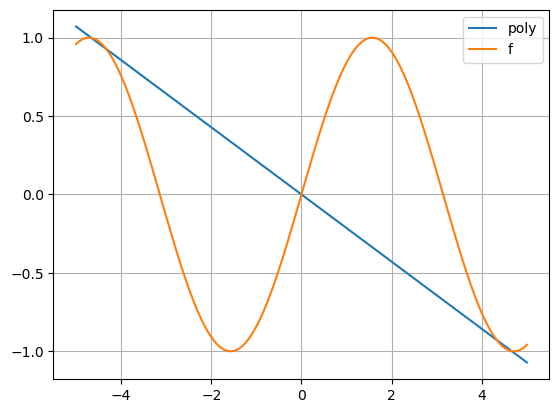

2 d=-0.6798111349912813 err=1.3596222699825629


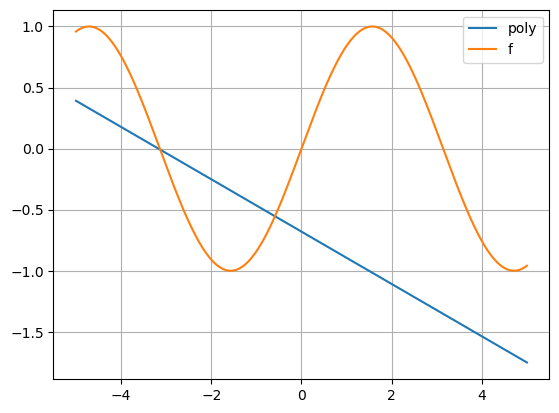

3 d=-0.9624685443965396 err=0.07526700379174256


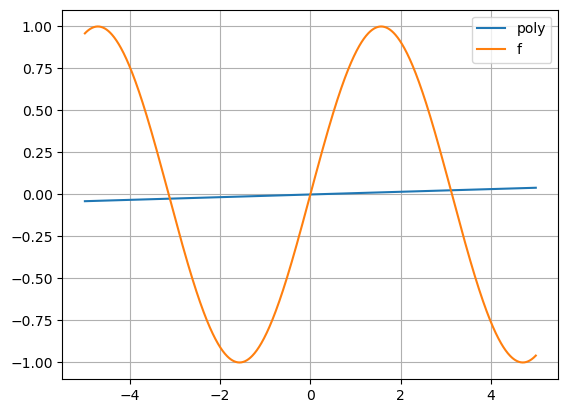

4 d=-0.9831380215916566 err=0.022468877506324536


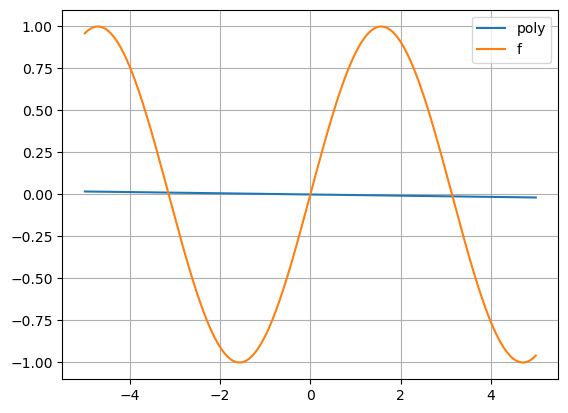

5 iterations to get 0.022468877506324536 error with eps=1e-05
max difference = 0.99 at x = 1.576576576576577


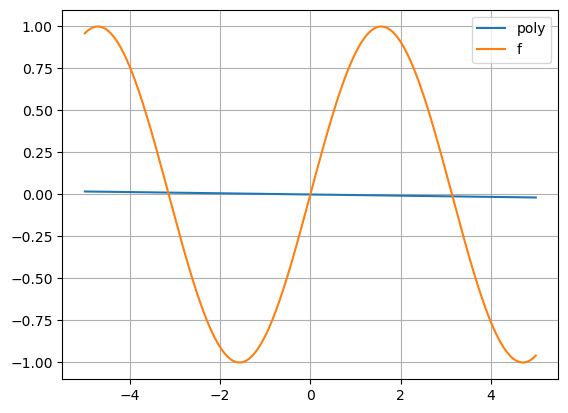

0.01160952 + (1.6143065e-06) x


In [226]:
remez(1, np.sin, -5, 5, 1e-5, 'chebyshev', 1000)